In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
from sqlalchemy import create_engine



## Data Ingestion with Python

### Import data

In [2]:
file_path = 'bank-full.csv'

In [3]:
df = pd.read_csv(file_path, sep = ';')

In [4]:
display(df.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df = df.rename(columns={'y': 'deposit'})

# Data Transformation with Python

### Cleaning data

#### Explore the dataset


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Overview of the existing data: The dataset show clear data types, and there are no NULL values present. The next step involves checking if the values adhere to the correct data types and exploring potential optimization opportunities.

#### Check the classes are distributed in categorical columns

In [7]:
df['job'].value_counts()


blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [8]:
df['marital'].value_counts()


married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [9]:
print(df['education'].value_counts())


secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


In [10]:
print(df['contact'].value_counts())


cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


In [11]:
print(df['poutcome'].value_counts())

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


After examining the categorical columns, it is observed that the values within the column are clearly defined. Overall, the data at this stage can be considered clean, and we will proceed to the next step of checking for any NaN values in the dataset.

#### Check isna

In [12]:
df.isna().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

After checkup, there are no existing NaN values in the dataset.

#### Check duplicated

In [13]:
duplicate_rows = df.duplicated()
display(duplicate_rows.sum())


0

After checkup, there are no existing duplicated rows in the dataset.

#### Check value binary type

In [14]:
#check value default column
df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [15]:
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [16]:
df['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [17]:
df['deposit'].value_counts()

no     39922
yes     5289
Name: deposit, dtype: int64

After checking the binary data types, the values are currently recorded as 'yes/no'. We will convert the data type to Boolean for optimization.

#### Modify values in binary columns

In [18]:
df['default'] = (df['default'].apply(lambda x: 1 if x == 'yes' else 0)).astype(bool)
df['housing'] = (df['housing'].apply(lambda x: 1 if x == 'yes' else 0)).astype(bool)
df['loan'] = (df['loan'].apply(lambda x: 1 if x == 'yes' else 0)).astype(bool)
df['deposit'] = (df['deposit'].apply(lambda x: 1 if x == 'yes' else 0)).astype(bool)


#### Indexing

Since the current data lacks information to serve as the primary key, we will use the index column named 'id' as the primary key."

In [19]:
df.index.name = 'id'
df = df.reset_index()

#### Display cleaned data

In [20]:
display(df.head())
print(df.shape)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,0,58,management,married,tertiary,False,2143,True,False,unknown,5,may,261,1,-1,0,unknown,False
1,1,44,technician,single,secondary,False,29,True,False,unknown,5,may,151,1,-1,0,unknown,False
2,2,33,entrepreneur,married,secondary,False,2,True,True,unknown,5,may,76,1,-1,0,unknown,False
3,3,47,blue-collar,married,unknown,False,1506,True,False,unknown,5,may,92,1,-1,0,unknown,False
4,4,33,unknown,single,unknown,False,1,False,False,unknown,5,may,198,1,-1,0,unknown,False


(45211, 18)


### Generate summary statistics for three key variables.


Analyzing three variables: age, balance, and housing.

In [21]:
df[['age','balance']].describe()

,age,balance
count,45211.000000,45211.000000
mean,40.936210,1362.272058
std,10.618762,3044.765829
min,18.000000,-8019.000000
25%,33.000000,72.000000
50%,39.000000,448.000000
75%,48.000000,1428.000000
max,95.000000,102127.000000


In [22]:
df[['age', 'balance', 'housing']].corr()

,age,balance,housing
age,1.000000,0.097783,-0.185513
balance,0.097783,1.000000,-0.068768
housing,-0.185513,-0.068768,1.000000


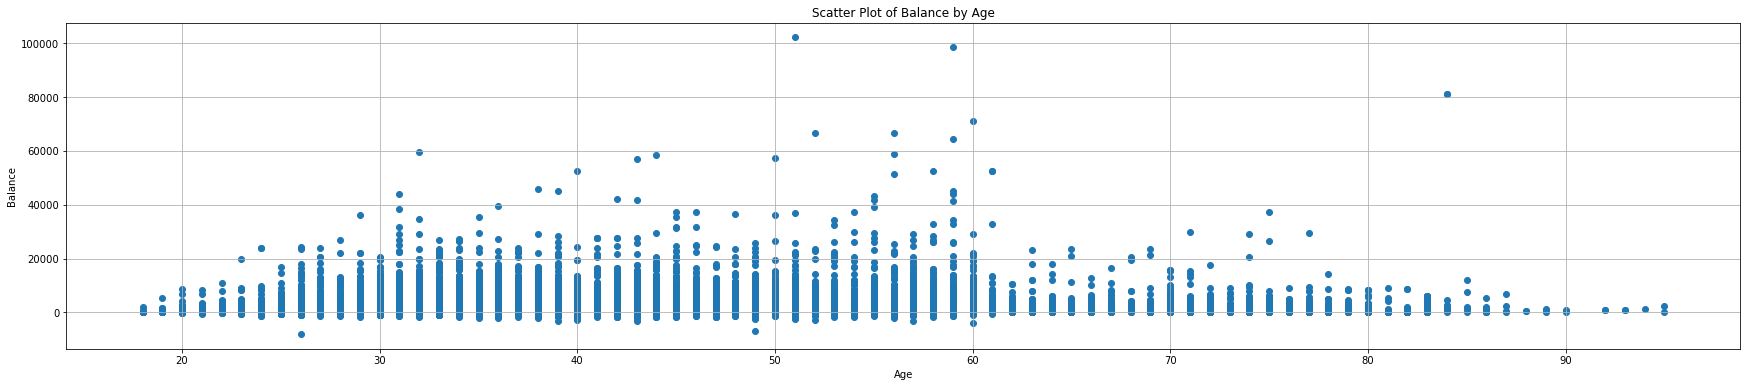

In [23]:
plt.figure(figsize=(30, 6))
plt.scatter(df['age'], df['balance'])
plt.title('Scatter Plot of Balance by Age')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.grid(True)
plt.show()

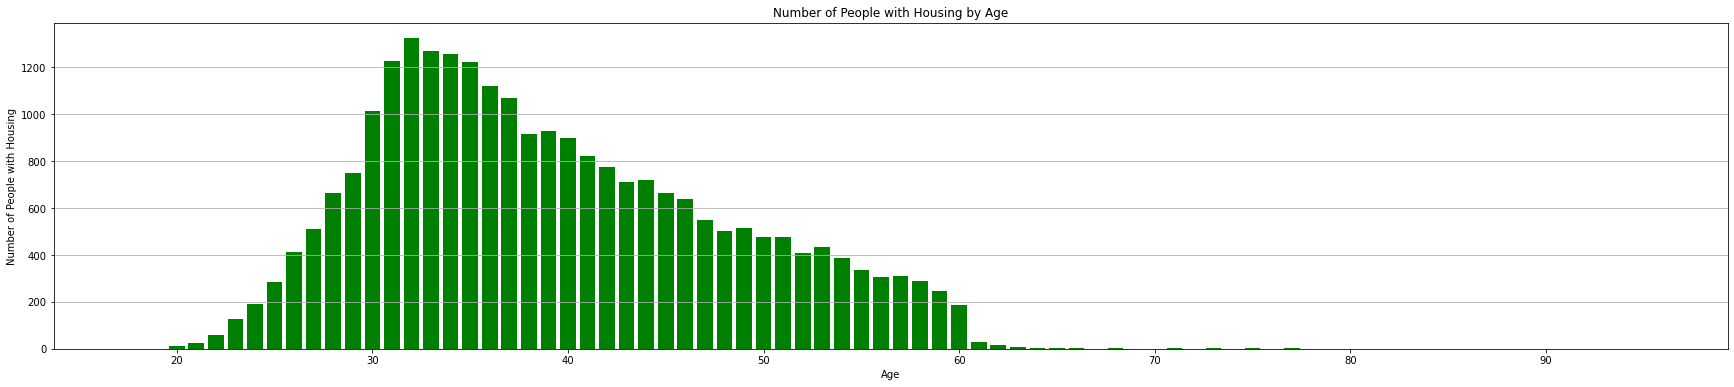

In [24]:
plt.figure(figsize=(30, 6))
plt.bar((df.groupby('age')['housing'].sum()).index,(df.groupby('age')['housing'].sum()).values, color='green')
plt.title('Number of People with Housing by Age')
plt.xlabel('Age')
plt.ylabel('Number of People with Housing')
plt.grid(axis='y')
plt.show()

Summary statistics
- The bank marketing dataset primarily consists of individuals in the working age range of 25 - 60.
- The working age range of 25 - 60 also exhibits the most diverse average yearly balance.
- The age of homeowners gradually increases from 18 - 32 years old and decreases from 32 - 65+. Among these, the age group with the highest homeownership is from 28 - 45 years old. The decreasing trend in homeownership among older age groups could be explained by the retirement phase, where individuals may transfer their assets to their families.